>                   * Digits Recognition in Kannada Language*

The objective of this kernel is to recognize the hand written digits (numerical symbols) in Kannada Language. The dataset contains 60k train & 10k test images of size 28X28 pixels each.The below image shows the numerical symbols in Kannada Language.
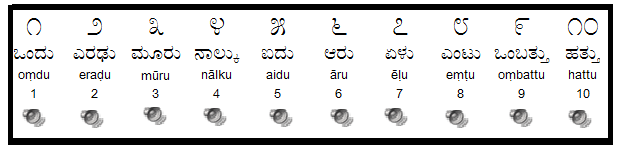

Image reference:
https://www.researchgate.net/figure/speech-for-Kannada-numbers_fig2_313113588

In [1]:
#Import required packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import scikitplot as skplt
from sklearn.metrics import classification_report,confusion_matrix

#Import packages for Deep learning
import keras
from keras.layers import Conv2D,Dense,Dropout,Flatten,Input
from keras.layers import Activation,MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam,sgd,RMSprop,Nadam,Adadelta,Adamax
from keras.callbacks import ModelCheckpoint,Callback,EarlyStopping
from keras.utils import to_categorical,plot_model
from keras.models import Model
from keras import backend as K

#Ensures consistency across runs
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
import os
import warnings
warnings.filterwarnings('ignore')
#Network visualization packages
import graphviz as gv
import pydot as pydot;


Using TensorFlow backend.


Load the datasets

In [2]:
ds_dir = '/kaggle/input/kannada-mnist/kannada_mnist_datataset_paper/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST'

X_train = np.load(os.path.join(ds_dir,'X_kannada_MNIST_train.npz'))['arr_0']
X_test = np.load(os.path.join(ds_dir,'X_kannada_MNIST_test.npz'))['arr_0']
y_train = np.load(os.path.join(ds_dir,'y_kannada_MNIST_train.npz'))['arr_0']
y_test = np.load(os.path.join(ds_dir,'y_kannada_MNIST_test.npz'))['arr_0']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


Text(0.5, 1.0, '1')

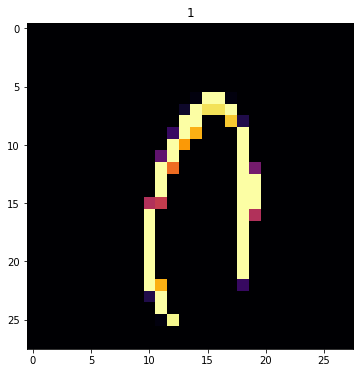

In [3]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[1],cmap='inferno')
plt.title(y_train[1])

Let's look at the 50 images

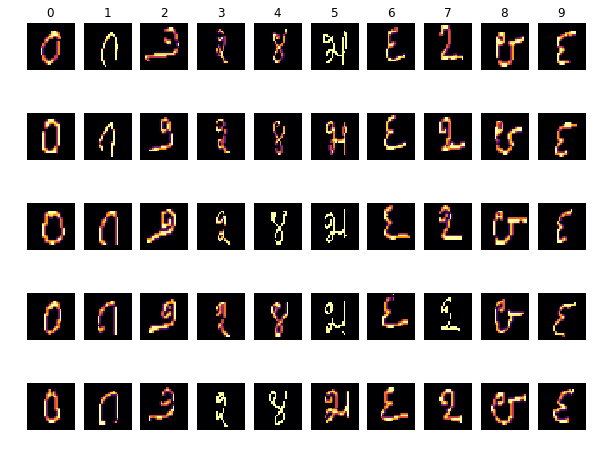

In [4]:
plt.figure(figsize=[10,8])
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis('Off')
    if i < 10:
        plt.title(y_train[i])
    plt.imshow(X_train[i], cmap='inferno')

Reference: https://www.kaggle.com/mirzarahim/kannada-mnist-digits-model-interpret-visualize

In [5]:
y_classes=np.unique(y_train)
y_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
#Reshape the datasets
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
print('Size after reshaping the datasets')
X_train.shape,X_test.shape


Size after reshaping the datasets


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
#Change datatype from uint8 to float64 & scale input data to the range (0,1)
X_train=X_train.astype('float64')/255
X_test=X_test.astype('float64')/255

In [8]:
#convert target labels from integers to categorical
y_train=to_categorical(y_train,num_classes=10,dtype='uint8')
print('Shape of the target labels...')
print(y_train.shape,y_test.shape)

Shape of the target labels...
(60000, 10) (10000,)


In [9]:
#Split the train data
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
print('Shape of the train data..')
print(X_train.shape,y_train.shape)
print('Shape of the validation data..')
print(X_val.shape,y_val.shape)

Shape of the train data..
(54000, 28, 28, 1) (54000, 10)
Shape of the validation data..
(6000, 28, 28, 1) (6000, 10)


In [10]:
#Shuffle train samples
X_train,y_train=shuffle(X_train,y_train,random_state=42)

> **Model with LeNet Architecture**

LeNet Architecture
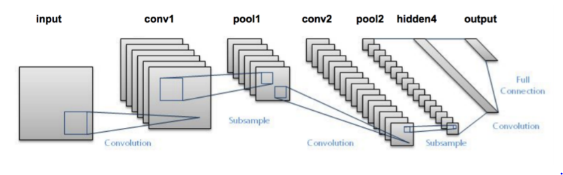

It contains two series of Conv=>ReLU=>Pool layer sets followed by a fully connected layer & softmax output.

In [11]:
#LeNet architecture
class LeNet:
     def build(width,height,depth,classes):
            #Initialize the model
            model=Sequential()
            input_shape=(height,width,depth)
            if K.image_data_format()=='channels_first':
                input_shape=(depth,height,width)
            #first set of Conv=>ReLU=> Pool layers
            model.add(Conv2D(20,(5,5),padding='same',input_shape=input_shape))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
            #Second set of Conv=>ReLU=> Pool layers
            model.add(Conv2D(50,(5,5),padding='same',input_shape=input_shape))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
            #FC=>ReLU layer with 500 nodes
            model.add(Flatten())
            model.add(Dense(500))
            model.add(Activation('relu'))
            #Add dense & softmax layer
            model.add(Dense(classes))
            model.add(Activation('softmax'))
            return model

In [12]:
#Initialize the optimizer & model
opt=sgd(lr=0.01)
model=LeNet.build(width=28,height=28,depth=1,classes=10)
plot_model(model,to_file='LeNet.png',show_shapes=True)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
__________

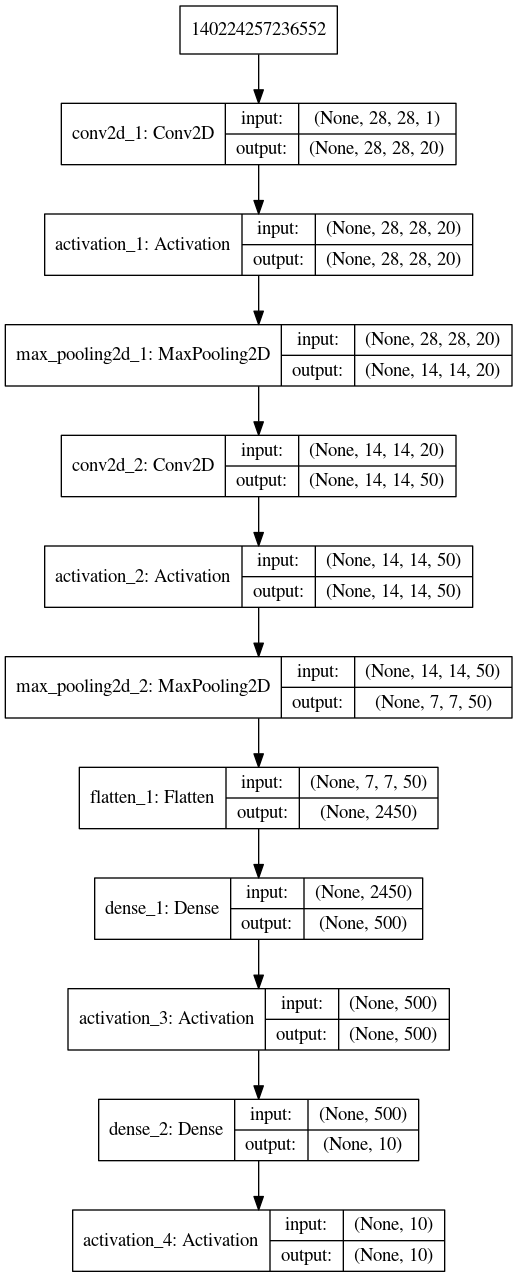

In [13]:
#Visualize LeNet architecture using graphviz
from IPython.display import Image
Image('LeNet.png')


In [14]:
#Prepare the model & save in the directory
save_dir=os.path.join(os.getcwd(),'saved_models')
model_name='Kannada_digit_recognition_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath=os.path.join(save_dir,model_name)

#Prepare callbacks for model saving & for learning rate adjustment
checkpoint=ModelCheckpoint(filepath=filepath,
                          monitor='val_acc',
                          verbose=1, mode='max',
                          save_best_only=True)
early_stopping=EarlyStopping(monitor='val_acc',mode='max',
                            verbose=1,patience=20)                      
callbacks=[checkpoint,early_stopping]

In [15]:
#train the network
print('training the network....')
history=model.fit(X_train,y_train,batch_size=32,
                   validation_data=(X_val,y_val),epochs=10,
                   verbose=1,
                    callbacks=callbacks,
                    shuffle=True
                   )

training the network....
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 65s 1ms/step - loss: 0.3529 - acc: 0.9090 - val_loss: 0.1034 - val_acc: 0.9687

Epoch 00001: val_acc improved from -inf to 0.96867, saving model to /kaggle/working/saved_models/Kannada_digit_recognition_model.h5
Epoch 2/10
54000/54000 [==============================] - 65s 1ms/step - loss: 0.0930 - acc: 0.9724 - val_loss: 0.0684 - val_acc: 0.9795

Epoch 00002: val_acc improved from 0.96867 to 0.97950, saving model to /kaggle/working/saved_models/Kannada_digit_recognition_model.h5
Epoch 3/10
54000/54000 [==============================] - 64s 1ms/step - loss: 0.0660 - acc: 0.9805 - val_loss: 0.0532 - val_acc: 0.9855

Epoch 00003: val_acc improved from 0.97950 to 0.98550, saving model to /kaggle/working/saved_models/Kannada_digit_recognition_model.h5
Epoch 4/10
54000/54000 [==============================] - 65s 1ms/step - loss: 0.0509 - acc: 0.9848 - val_loss

In [16]:
#Evaluate the network
print('Evaluatng the network...')
y_pred=model.predict(X_test,batch_size=32)
target_names=['0','1','2','3','4','5','6','7','8','9']
classification_report=classification_report(y_test,y_pred.argmax(axis=1),
                                            target_names=target_names)
print('Classification Report...')
print(classification_report)

Evaluatng the network...
Classification Report...
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1000
           1       0.93      0.97      0.95      1000
           2       0.99      0.99      0.99      1000
           3       0.97      0.90      0.93      1000
           4       0.92      0.98      0.95      1000
           5       0.97      0.95      0.96      1000
           6       0.98      0.95      0.96      1000
           7       0.91      0.95      0.93      1000
           8       0.99      1.00      0.99      1000
           9       0.98      0.99      0.98      1000

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



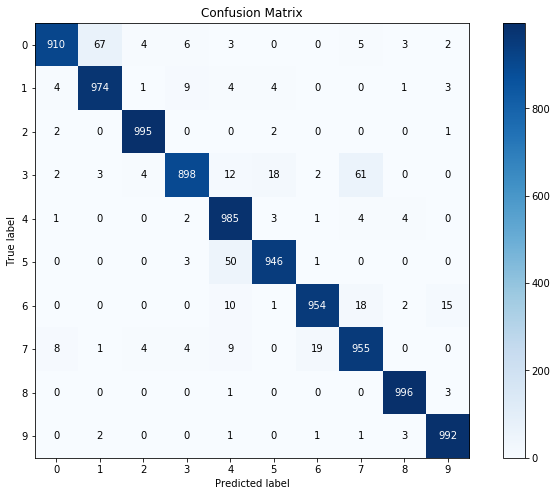

In [17]:
#plot our confusion matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred.argmax(axis=1),normalize=False,figsize=(12,8))
plt.show()

Out of 10000 test images, 399 images are misclassified &  remaining 9601 images are classified correctly.

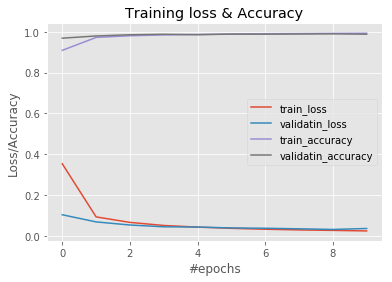

In [18]:
#Plot the training loss & accuracy
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,10),history.history['loss'],label='train_loss')
plt.plot(np.arange(0,10),history.history['val_loss'],label='validatin_loss')
plt.plot(np.arange(0,10),history.history['acc'],label='train_accuracy')
plt.plot(np.arange(0,10),history.history['val_acc'],label='validatin_accuracy')
plt.title('Training loss & Accuracy')
plt.xlabel('#epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

The model performed well on train & validation dataset with no signs of overfitting. This model gives 96% classification accuracy on test dataset. Overall LeNet model performace is great on Kannada_MNIST dataset.

References:-
1. Deep Learning for computer vision with Python book by Adrian Rosebrock
2. Keras documentation- https://keras.io/